<a href="https://colab.research.google.com/github/hellomstars/DeepLearning/blob/main/Keras_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Keras를 사용한 MLP 구현**

###Sequential API를 사용한 image classifier

In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist #mnist : 숫자 필기를 이미지화해서 다룬 데이터 / fashion_mnist는 의류를 다루는 저장된 이미지 데이터
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() #train과 test는 같이 다루지 않는다

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train_full.shape) #훈련 세트는 60000개의 흑백 이미지이며 각 이미지의 크기는 28x28 픽셀
print(X_train_full.dtype) #각 픽셀의 강도는 바이트(0~255)로 표현
print(y_train_full.shape)
print(y_train_full.dtype)

(60000, 28, 28)
uint8
(60000,)
uint8


In [ ]:
#전체 train 세트를 5000개 기준으로 test 세트와 더 작은 train 세트 valid로 나눈다
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0 #픽셀 강도를 255로 나누어 0~1 범위의 실수로 변경(정규화)
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] #y는 카테고리에 대한 정답을 갖고 있으므로 정규화 안 한다
X_test = X_test / 255.0

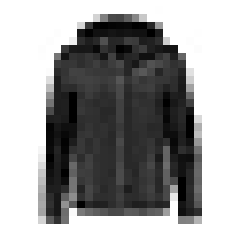

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary") #imshow() 함수와 'binary' 컬러맵을 사용해 이미지를 출력
plt.axis('off')
plt.show()

In [ ]:
y_train #레이블은 0에서 9까지 (uint8로 표현된) 클래스 아이디

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] #클래스 이름 지정. 0~9까지 저장
class_names[y_train[0]] #훈련 세트에 있는 첫 번째 이미지

'Coat'

In [ ]:
print(X_valid.shape) #검증 세트는 5000개의 이미지를 가진다
print(X_test.shape) #테스트 세트는 10000개의 이미지를 가진다

(5000, 28, 28)
(10000, 28, 28)


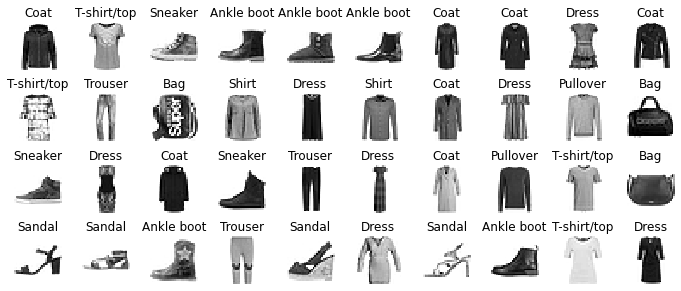

In [ ]:
#데이터셋에 있는 샘플 이미지 출력
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
#모델 정의
model = keras.models.Sequential() #sequential인지 functinal인지 선언
model.add(keras.layers.Flatten(input_shape=[28, 28])) #입력층에 저장된 메트릭스 형태(여기서는 28x28 배열)를 한 줄의 벡터로 저장.
model.add(keras.layers.Dense(300, activation="relu")) #위에서 아래로 하나씩 레이어가 저장된다 activation : 활성화 함수
model.add(keras.layers.Dense(100, activation="relu")) #숫자는 각 레이어의 퍼셉트론 갯수를 의미. relu : 경사함수
model.add(keras.layers.Dense(10, activation="softmax")) #softmax는 확률분포와 같음. 다른 뉴런의 출력값과 상대적인 비교를 통해 최종 출력값 결정. 신경망의 최종단에 사용하면 해당 값이 나올 확률을 알 수 있음.
model.summary() #784에 +1한 값인 785x300 - 235500 / 301x100 = 30100 / 101x10 = 1010

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
]) #model에 레이어 저장하는 방법을 리스트로 작성
model.summary() #위에와 같이 출력. flatten과 dense가 한 번씩 더 쌓여서 layer 이름에 숫자가 하나씩 올라서 출력된다

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers #레이어들이 리스트로 저장됨

In [ ]:
hidden1 = model.layers[1] #레이어를 인덱싱해서 활용 가능
print(hidden1.name) #레이어의 변수명 출력
print(model.get_layer('dense_3') is hidden1) #변수명을 get_layer을 통해 호출 가능

dense_3
True


In [ ]:
weights, biases = hidden1.get_weights() #레이어에 해당하는 실제 파라미터 값 반환
weights #weight와 bias가 모여서 layer 구성, layer들이 모여서 model 구성

array([[-0.04242705, -0.07005557,  0.05965023, ..., -0.05211371,
        -0.06261846, -0.05320416],
       [-0.03558205,  0.01073115,  0.06220414, ..., -0.06792118,
         0.0710997 , -0.01752413],
       [ 0.06828944, -0.06382683,  0.04461297, ..., -0.07273125,
        -0.05423257,  0.03372113],
       ...,
       [-0.07100876, -0.02985425, -0.06294054, ..., -0.05260978,
        -0.01924611,  0.01314706],
       [-0.06871799, -0.07414382,  0.01147825, ...,  0.00253203,
         0.05652745,  0.05564766],
       [-0.03000848, -0.00059082, -0.00495096, ...,  0.070419  ,
        -0.04304771,  0.05569641]], dtype=float32)

In [ ]:
weights.shape #입력층~은닉층

(784, 300)

In [ ]:
print(biases)
print(biases.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(300,)


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", #loss function 정의
              optimizer="sgd", #그레디언트를 사용할 건지 변형된 것을 사용할 건지 최적화에 사용할 것 정의
              metrics=["accuracy"]) #컴파일 구조 결정

In [ ]:
#모델 훈련 및 평가. fit은 훈련 predict는 평가. 여기서 평가는 valid로 한다.
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid)) #30번 실행 시 loss가 점점 줄어들고 이 값이 작을수록 좋다. validation_data를 통해 정상적으로 훈련되는지 확인 가능.ㄴ

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7203 - accuracy: 0.7633 - val_loss: 0.5185 - val_accuracy: 0.8252
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4904 - accuracy: 0.8297 - val_loss: 0.4566 - val_accuracy: 0.8454
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4438 - accuracy: 0.8450 - val_loss: 0.4184 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4162 - accuracy: 0.8543 - val_loss: 0.4083 - val_accuracy: 0.8584
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3972 - accuracy: 0.8610 - val_loss: 0.3853 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3822 - accuracy: 0.8663 - val_loss: 0.3801 - val_accuracy: 0.8656
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3673 - accuracy: 0.8702 - val_loss: 0.3643 - val_accuracy:

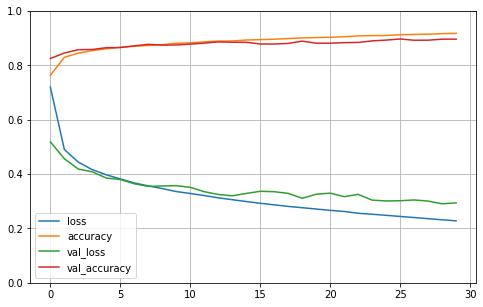

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #수직축의 범위를 [0-1]사이로 설정
plt.show()

In [ ]:
model.evaluate(X_test, y_test) #validation_data 없이 시행해서 진짜 성적에 더 가까움. 88%가 이 모델의 최종 성능이 되는 것

313/313 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8842


[0.32588037848472595, 0.8841999769210815]

In [ ]:
#모델이 잘 되나 훈련한 모델을 사용한 예측
X_new = X_test[:3] #X_test에서 0, 1, 2값만 우선 확인
y_proba = model.predict(X_new) #확률값
y_proba.round(2) #소수 둘째자리까지만 보자. 

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
import numpy as np

y_pred = np.argmax(model.predict(X_new), axis=-1) #tensorflow 버전 2.6이후로 predict_classes가 없기 때문에 오류가 발생하므로 다른 방법으로 다중분류
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

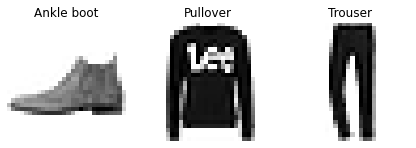

In [ ]:
plt.figure(figsize=(7.2, 2.4)) #인덱스에 맞춘 그림과 표현
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)